In [6]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Model tuning
from sklearn.model_selection import GridSearchCV

# Ensemble tools
from sklearn.ensemble import VotingClassifier

# Other
import warnings
warnings.filterwarnings('ignore')

First few rows of the dataset:


,Math1,Math2,Physics1,Physics2,Physics3,Chemistry1,Chemistry2,10_8_8 Failure Status
0,B,B,A,B,A,B,B,0
1,B,A,A,A,B,B,B,0
2,A,B,B,A,B,A,C,0
3,A,A,A,A,A,A,B,0
4,B,B,C,B,C,A,A,0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Math1                  1000 non-null   object
 1   Math2                  1000 non-null   object
 2   Physics1               1000 non-null   object
 3   Physics2               1000 non-null   object
 4   Physics3               1000 non-null   object
 5   Chemistry1             1000 non-null   object
 6   Chemistry2             1000 non-null   object
 7   10_8_8 Failure Status  1000 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 62.6+ KB
None

Missing values:
Math1                    0
Math2                    0
Physics1                 0
Physics2                 0
Physics3                 0
Chemistry1               0
Chemistry2               0
10_8_8 Failure Status    0
dtype: int64

Class distribution:
10_8_8 Failure Status
0    850
1    150
Name: c

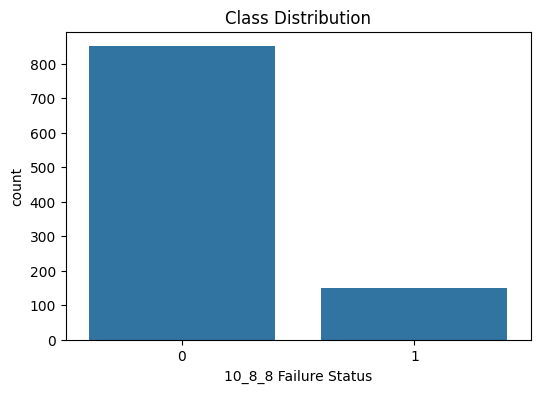

In [7]:
# Load the dataset
data = pd.read_csv('10 8 8 dataset.csv')

# Display first few rows
print("First few rows of the dataset:")
display(data.head())

# Basic info
print("\nDataset info:")
print(data.info())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Class distribution
print("\nClass distribution:")
print(data['10_8_8 Failure Status'].value_counts())

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='10_8_8 Failure Status', data=data)
plt.title('Class Distribution')
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Math1                  1000 non-null   object
 1   Math2                  1000 non-null   object
 2   Physics1               1000 non-null   object
 3   Physics2               1000 non-null   object
 4   Physics3               1000 non-null   object
 5   Chemistry1             1000 non-null   object
 6   Chemistry2             1000 non-null   object
 7   10_8_8 Failure Status  1000 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [9]:
# Convert letter grades to numerical values (A=5, B=4, C=3, D=2, F=1)
grade_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1, 'E': 2}  # Considering E similar to D

# Apply mapping to all grade columns
grade_columns = ['Math1', 'Math2', 'Physics1', 'Physics2', 'Physics3', 'Chemistry1', 'Chemistry2']
for col in grade_columns:
    data[col] = data[col].map(grade_mapping)

# Separate features and target
X = data.drop('10_8_8 Failure Status', axis=1)
y = data['10_8_8 Failure Status']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

Training set shape: (800, 7)
Test set shape: (200, 7)

Class distribution in training set:
10_8_8 Failure Status
0    680
1    120
Name: count, dtype: int64

Class distribution in test set:
10_8_8 Failure Status
0    170
1     30
Name: count, dtype: int64


In [10]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model and print metrics for both training and test sets
    """
    # Training set evaluation
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    
    print("Training Set Metrics:")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
    print(f"F1 Score: {f1_score(y_train, y_train_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_train, y_train_prob):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_train, y_train_pred))
    
    # Test set evaluation
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    print("\nTest Set Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_test_prob):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    # Confusion matrix
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Training Set Confusion Matrix')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Test Set Confusion Matrix')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'train_precision': precision_score(y_train, y_train_pred),
        'train_recall': recall_score(y_train, y_train_pred),
        'train_f1': f1_score(y_train, y_train_pred),
        'train_roc_auc': roc_auc_score(y_train, y_train_prob),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_precision': precision_score(y_test, y_test_pred),
        'test_recall': recall_score(y_test, y_test_pred),
        'test_f1': f1_score(y_test, y_test_pred),
        'test_roc_auc': roc_auc_score(y_test, y_test_prob)
    }


Training and evaluating Decision Tree
Training Set Metrics:
Accuracy: 0.9962
Precision: 1.0000
Recall: 0.9750
F1 Score: 0.9873
ROC AUC: 0.9879

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      0.97      0.99       120

    accuracy                           1.00       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      1.00      1.00       800


Test Set Metrics:
Accuracy: 0.9750
Precision: 1.0000
Recall: 0.8333
F1 Score: 0.9091
ROC AUC: 0.8681

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       170
           1       1.00      0.83      0.91        30

    accuracy                           0.97       200
   macro avg       0.99      0.92      0.95       200
weighted avg       0.98      0.97      0.97       200



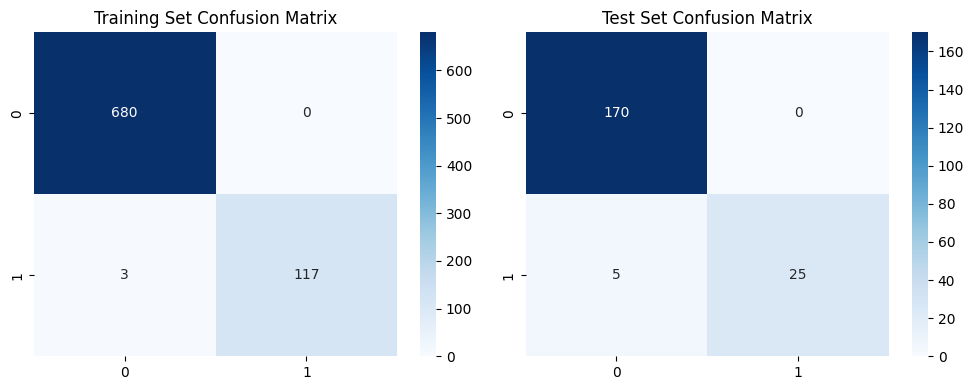


Training and evaluating Random Forest
Training Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00       120

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Test Set Metrics:
Accuracy: 0.9900
Precision: 1.0000
Recall: 0.9333
F1 Score: 0.9655
ROC AUC: 0.9982

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       170
           1       1.00      0.93      0.97        30

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200



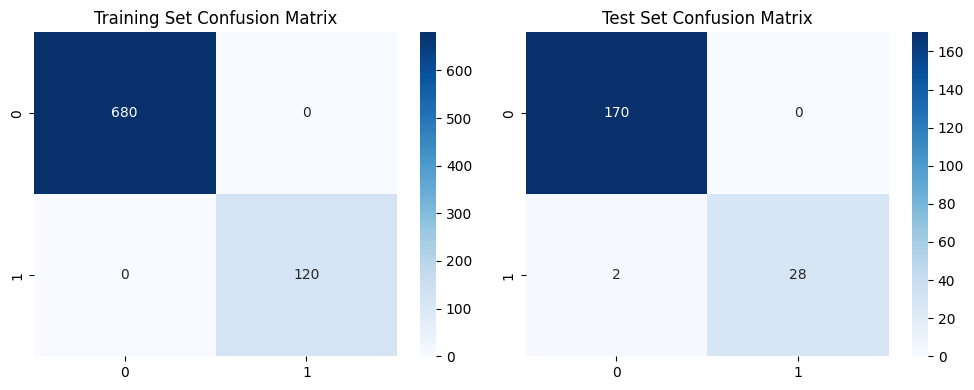


Training and evaluating XGBoost
Training Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00       120

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Test Set Metrics:
Accuracy: 0.9950
Precision: 1.0000
Recall: 0.9667
F1 Score: 0.9831
ROC AUC: 0.9982

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       170
           1       1.00      0.97      0.98        30

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



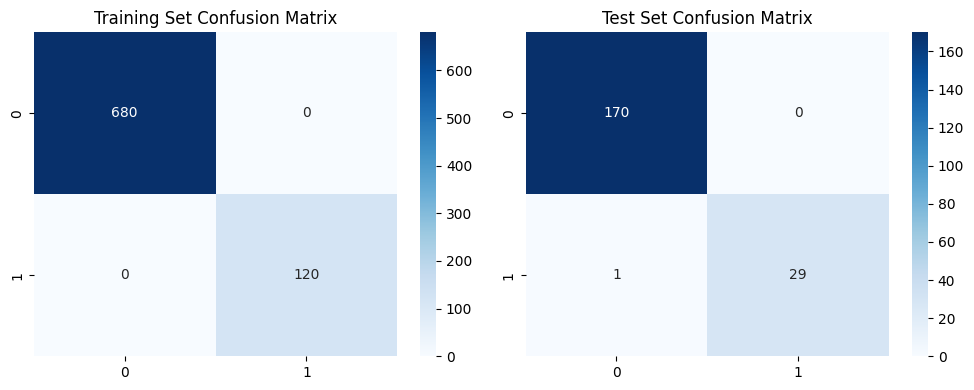


Training and evaluating LightGBM
[LightGBM] [Info] Number of positive: 120, number of negative: 680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150000 -> initscore=-1.734601
[LightGBM] [Info] Start training from score -1.734601
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

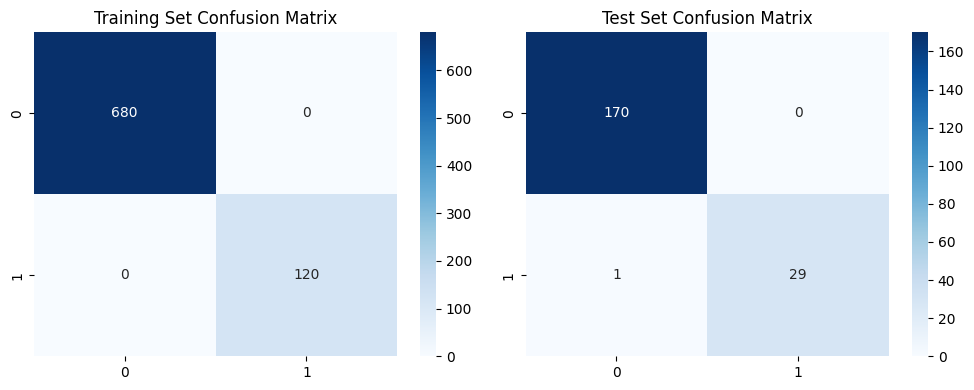


Training and evaluating CatBoost
Training Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00       120

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Test Set Metrics:
Accuracy: 0.9900
Precision: 1.0000
Recall: 0.9333
F1 Score: 0.9655
ROC AUC: 0.9986

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       170
           1       1.00      0.93      0.97        30

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200



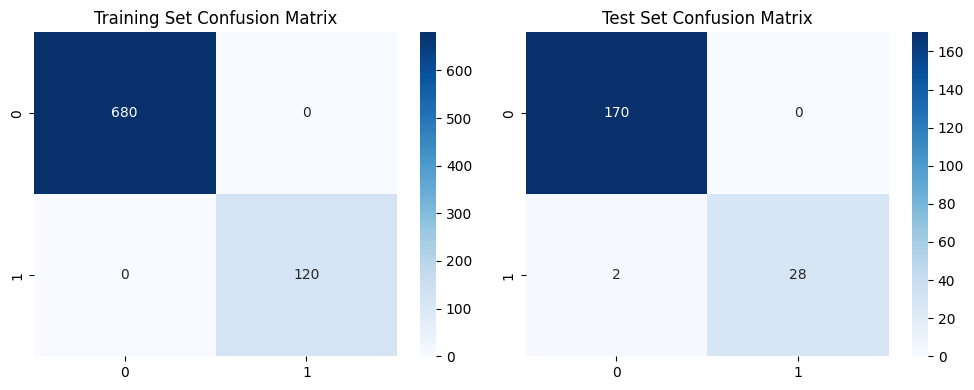

In [11]:
# Initialize models with some basic parameters
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Dictionary to store evaluation results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training and evaluating {name}")
    print(f"{'='*50}")
    
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

Tuning Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Tuning XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best XGBoost params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}

Evaluating tuned Random Forest:
Training Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00       120

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Test Set Metrics:
Accuracy: 0.9900
Precision: 1.0000
Recall: 0.9333
F1 Score: 0.9655
ROC AUC: 0.9980

Clas

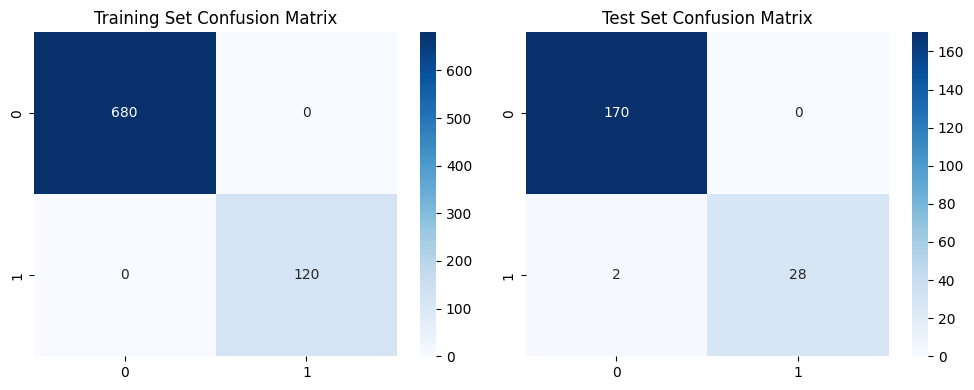


Evaluating tuned XGBoost:
Training Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00       120

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Test Set Metrics:
Accuracy: 0.9950
Precision: 1.0000
Recall: 0.9667
F1 Score: 0.9831
ROC AUC: 0.9986

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       170
           1       1.00      0.97      0.98        30

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



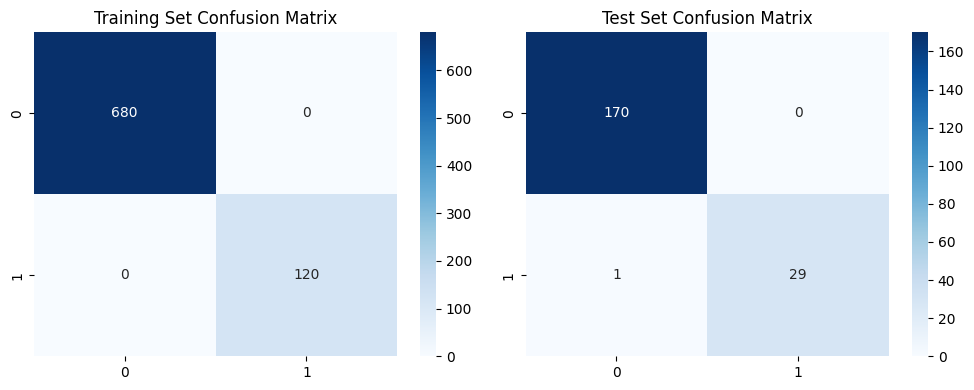

In [12]:
# Let's tune the top performing models (based on previous results)
# Note: In practice, you'd look at the results from Block 5 to decide which models to tune

# Tuning Random Forest
print("Tuning Random Forest...")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid=rf_param_grid,
                      cv=5,
                      scoring='f1',
                      n_jobs=-1,
                      verbose=1)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print(f"Best Random Forest params: {rf_grid.best_params_}")

# Tuning XGBoost
print("\nTuning XGBoost...")
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
                       param_grid=xgb_param_grid,
                       cv=5,
                       scoring='f1',
                       n_jobs=-1,
                       verbose=1)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print(f"Best XGBoost params: {xgb_grid.best_params_}")

# Evaluate tuned models
print("\nEvaluating tuned Random Forest:")
results['Tuned Random Forest'] = evaluate_model(best_rf, X_train, y_train, X_test, y_test)

print("\nEvaluating tuned XGBoost:")
results['Tuned XGBoost'] = evaluate_model(best_xgb, X_train, y_train, X_test, y_test)

Training Voting Classifier...
[LightGBM] [Info] Number of positive: 120, number of negative: 680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150000 -> initscore=-1.734601
[LightGBM] [Info] Start training from score -1.734601
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

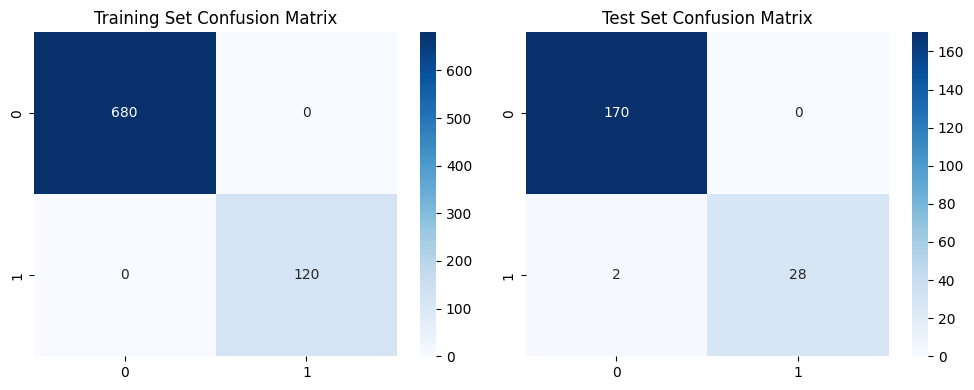


Training Stacking Classifier...
Training Set Metrics:
Accuracy: 0.9988
Precision: 1.0000
Recall: 0.9917
F1 Score: 0.9958
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      0.99      1.00       120

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Test Set Metrics:
Accuracy: 0.9900
Precision: 1.0000
Recall: 0.9333
F1 Score: 0.9655
ROC AUC: 0.9986

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       170
           1       1.00      0.93      0.97        30

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200



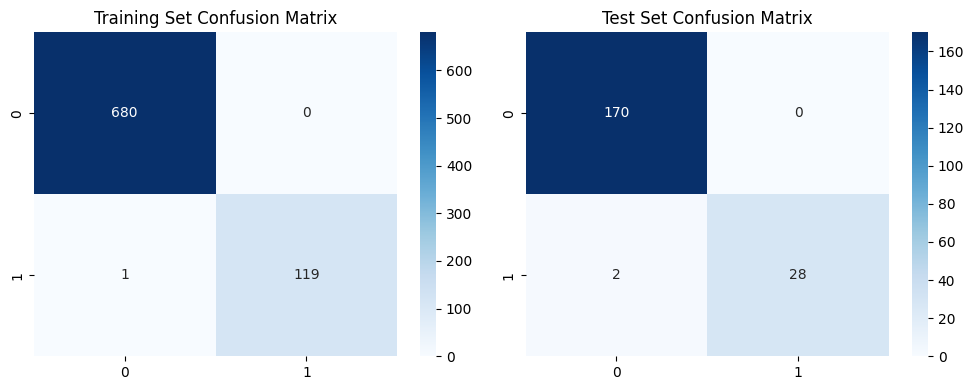

In [13]:
# Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lgbm', LGBMClassifier(random_state=42)),
        ('cat', CatBoostClassifier(random_state=42, verbose=0))
    ],
    voting='soft'  # soft voting often works better
)

print("Training Voting Classifier...")
voting_clf.fit(X_train, y_train)
results['Voting Classifier'] = evaluate_model(voting_clf, X_train, y_train, X_test, y_test)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lgbm', LGBMClassifier(random_state=42)),
        ('cat', CatBoostClassifier(random_state=42, verbose=0))
    ],
    final_estimator=CatBoostClassifier(random_state=42, verbose=0),
    stack_method='predict_proba',
    n_jobs=-1
)

print("\nTraining Stacking Classifier...")
stacking_clf.fit(X_train, y_train)
results['Stacking Classifier'] = evaluate_model(stacking_clf, X_train, y_train, X_test, y_test)

Model Performance Comparison:


,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
XGBoost,1.00000,1.0,1.000000,1.000000,1.000000,0.995,1.0,0.966667,0.983051,0.998235
Tuned XGBoost,1.00000,1.0,1.000000,1.000000,1.000000,0.995,1.0,0.966667,0.983051,0.998627
LightGBM,1.00000,1.0,1.000000,1.000000,1.000000,0.995,1.0,0.966667,0.983051,0.998627
CatBoost,1.00000,1.0,1.000000,1.000000,1.000000,0.990,1.0,0.933333,0.965517,0.998627
Random Forest,1.00000,1.0,1.000000,1.000000,1.000000,0.990,1.0,0.933333,0.965517,0.998235
Voting Classifier,1.00000,1.0,1.000000,1.000000,1.000000,0.990,1.0,0.933333,0.965517,0.998627
Tuned Random Forest,1.00000,1.0,1.000000,1.000000,1.000000,0.990,1.0,0.933333,0.965517,0.998039
Stacking Classifier,0.99875,1.0,0.991667,0.995816,1.000000,0.990,1.0,0.933333,0.965517,0.998627
Decision Tree,0.99625,1.0,0.975000,0.987342,0.987868,0.975,1.0,0.833333,0.909091,0.868137


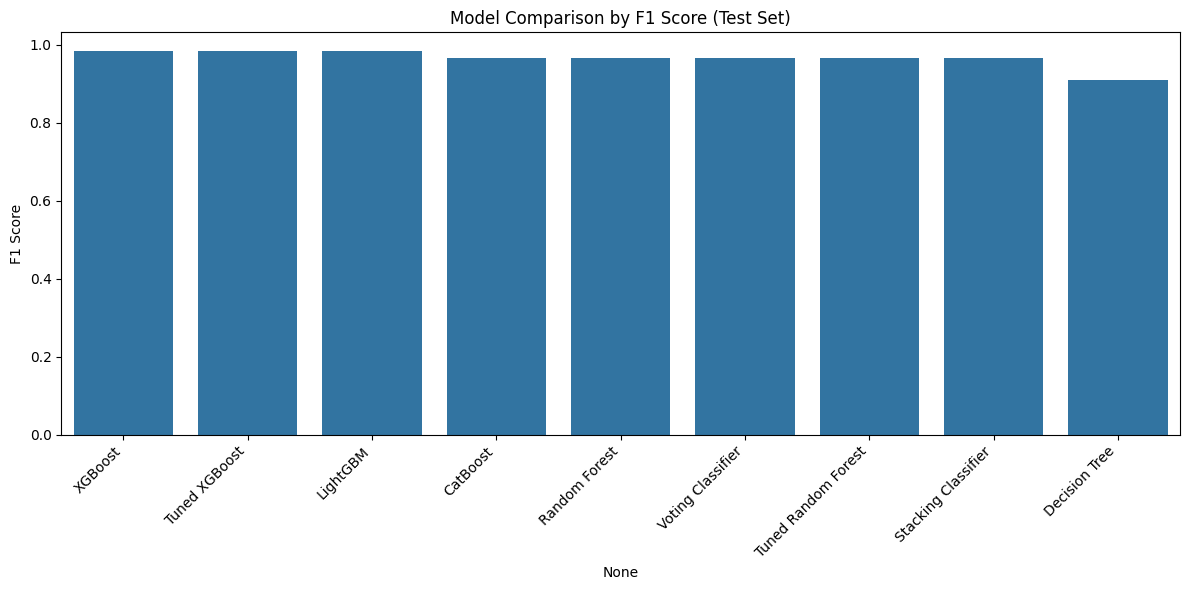

In [14]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.sort_values(by='test_f1', ascending=False)

# Display the comparison
print("Model Performance Comparison:")
display(comparison_df)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=comparison_df.index, y='test_f1', data=comparison_df)
plt.xticks(rotation=45, ha='right')
plt.title('Model Comparison by F1 Score (Test Set)')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

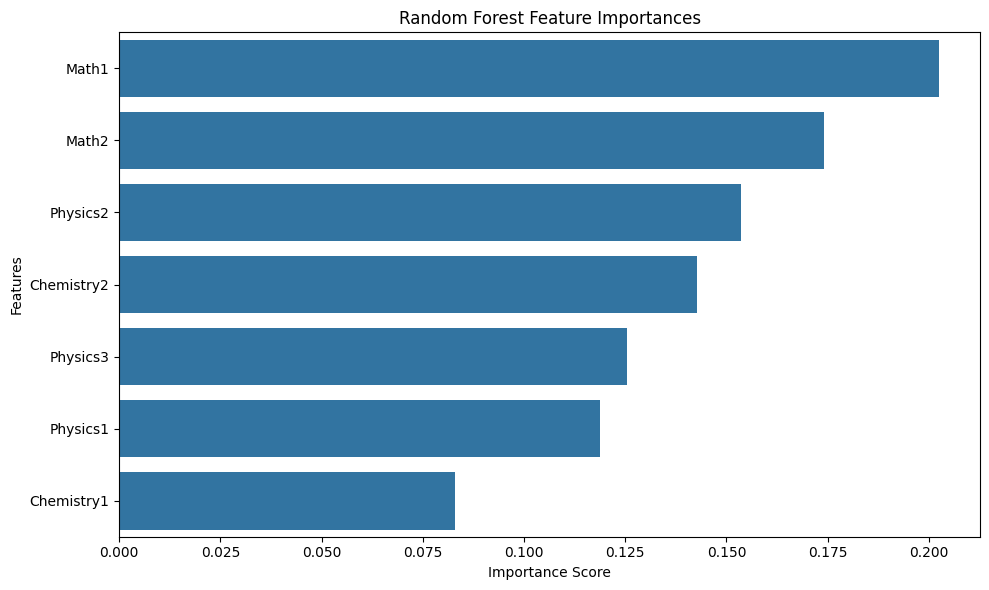

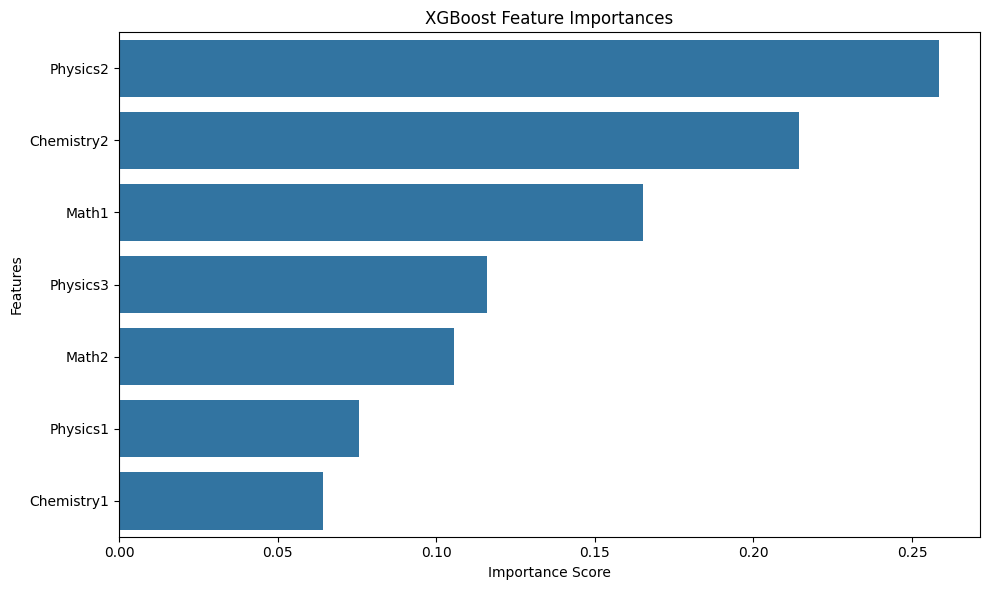

In [15]:
# Get feature importances from the best model (assuming it's the stacking classifier)
# Note: For stacking, we'll look at one of the base models' feature importances

plt.figure(figsize=(10, 6))

# Get feature importances from Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

sns.barplot(x=forest_importances.values, y=forest_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Get feature importances from XGBoost
plt.figure(figsize=(10, 6))
importances = best_xgb.feature_importances_
xgb_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

sns.barplot(x=xgb_importances.values, y=xgb_importances.index)
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

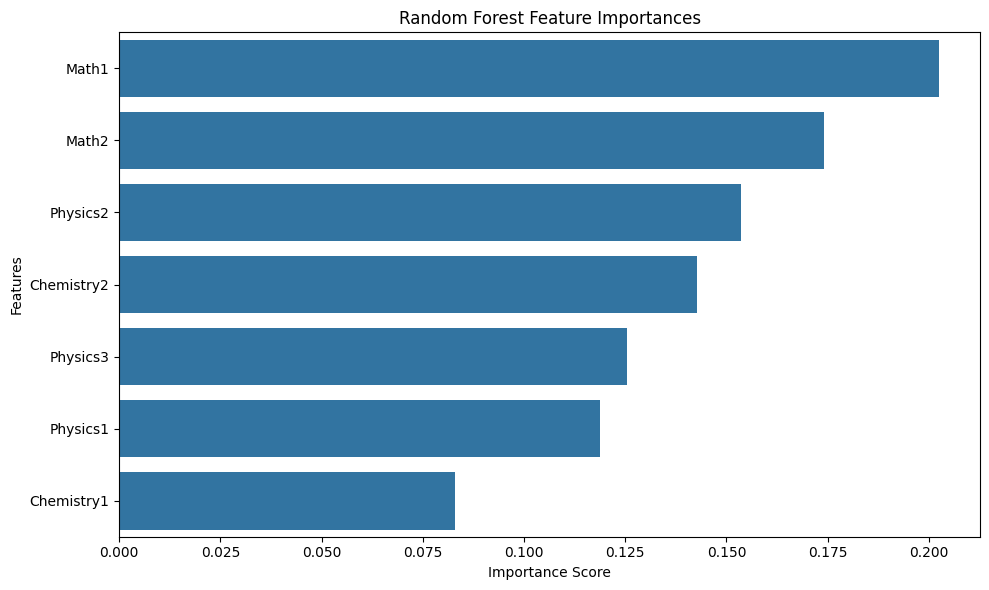

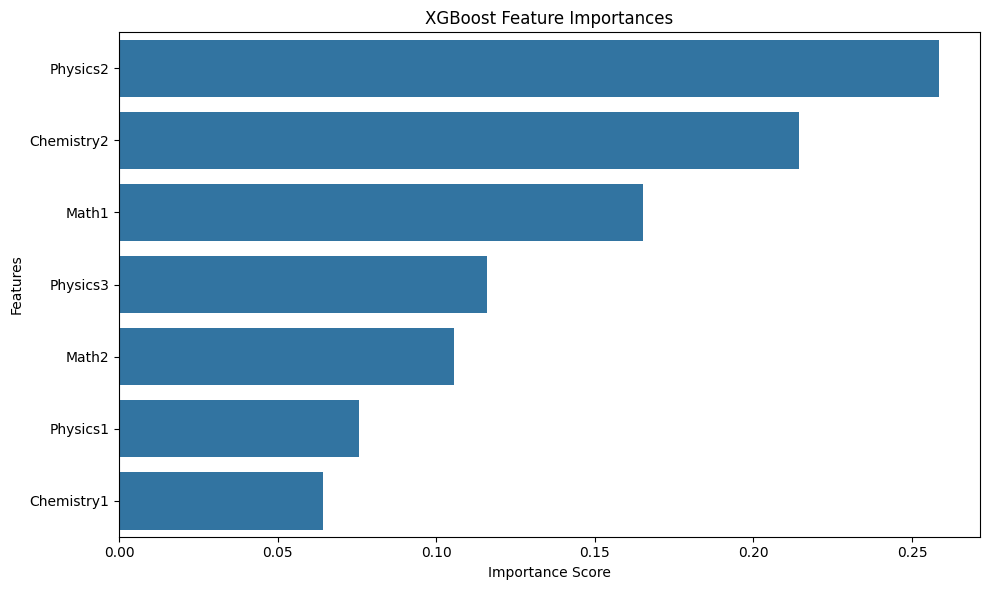

In [16]:
# Get feature importances from the best model (assuming it's the stacking classifier)
# Note: For stacking, we'll look at one of the base models' feature importances

plt.figure(figsize=(10, 6))

# Get feature importances from Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

sns.barplot(x=forest_importances.values, y=forest_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Get feature importances from XGBoost
plt.figure(figsize=(10, 6))
importances = best_xgb.feature_importances_
xgb_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

sns.barplot(x=xgb_importances.values, y=xgb_importances.index)
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [17]:
# Select the best model based on test F1 score
best_model_name = comparison_df.index[0]
if best_model_name == 'Voting Classifier':
    best_model = voting_clf
elif best_model_name == 'Stacking Classifier':
    best_model = stacking_clf
else:
    best_model = models[best_model_name]

print(f"Selected best model: {best_model_name}")

# Function to make predictions on new data
def predict_failure_status(grades):
    """
    Predict 10-8-8 failure status based on student grades
    
    Parameters:
    grades (dict): Dictionary containing grades for each subject
        Expected keys: Math1, Math2, Physics1, Physics2, Physics3, Chemistry1, Chemistry2
        Values should be letter grades (A, B, C, D, F)
    
    Returns:
    dict: Prediction results with probabilities
    """
    # Convert grades to numerical values
    numerical_grades = {k: grade_mapping[v] for k, v in grades.items()}
    
    # Create DataFrame
    input_data = pd.DataFrame([numerical_grades])
    
    # Make prediction
    prob = best_model.predict_proba(input_data)[0]
    prediction = best_model.predict(input_data)[0]
    
    return {
        'prediction': 'Fail' if prediction == 1 else 'Pass',
        'probability_of_failure': float(prob[1]),
        'probability_of_pass': float(prob[0])
    }

# Example usage
example_grades = {
    'Math1': 'B',
    'Math2': 'C',
    'Physics1': 'A',
    'Physics2': 'B',
    'Physics3': 'C',
    'Chemistry1': 'B',
    'Chemistry2': 'A'
}

print("\nExample Prediction:")
print(predict_failure_status(example_grades))

Selected best model: XGBoost

Example Prediction:
{'prediction': 'Pass', 'probability_of_failure': 0.00013077491894364357, 'probability_of_pass': 0.9998692274093628}


In [18]:
import joblib

# Save the best model
joblib.dump(best_model, '10_8_8_failure_predictor.pkl')

# Save the grade mapping for later use
joblib.dump(grade_mapping, 'grade_mapping.pkl')

print("Model and grade mapping saved successfully.")

Model and grade mapping saved successfully.
